### prediction model for Churn_out_rate 

#### Importing Libearies 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

#### Importing the Dataset 

In [2]:
data = pd.read_csv('F://Data_Set/emp_data.csv') 

In [3]:
data.head() 

,Salary_hike,Churnout_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


Check Dataset Information 

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Salary_hike    10 non-null     int64
 1   Churnout_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [5]:
data.shape  

(10, 2)

Check any Null Vaue Present in the Dataset 

In [6]:
data.isnull().sum() 

Salary_hike      0
Churnout_rate    0
dtype: int64

Chck any Outlier Present in the Dataset or Not 

Box Plot of Sary Hike Column 

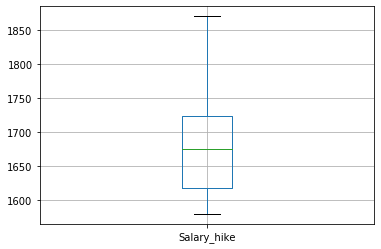

In [7]:
data.boxplot(column='Salary_hike') 

Box Plot of Churn Out rate 

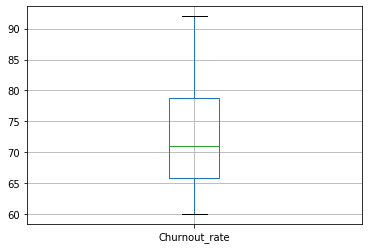

In [8]:
data.boxplot(column='Churnout_rate')  

### 1st Model Genration 

In [9]:
dataset_1 = data 

#### Visualization of Dataset by using Dist Plot 

Vsualization of Salary Hike Column 

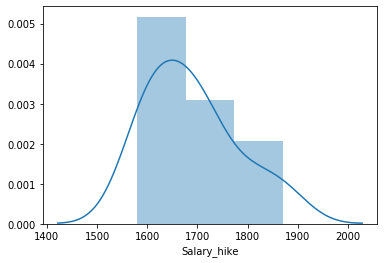

In [10]:
sns.distplot(dataset_1['Salary_hike']) 

Visualization of Charn_out_rate Column 

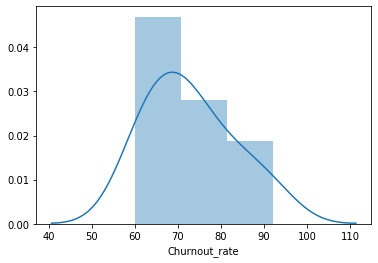

In [11]:
sns.distplot(dataset_1['Churnout_rate']) 

#### Fitting 1st Simple Linear Regression Model on the Dataset 

In [12]:
model_1 = smf.ols('Salary_hike~Churnout_rate',data=dataset_1).fit()  

Regression Plot of 1st model 

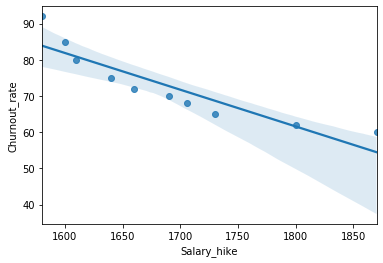

In [13]:
sns.regplot(x='Salary_hike',y='Churnout_rate',data=dataset_1)  

Test for Normality of Residuals (Q-Q Plot) of 1st Model

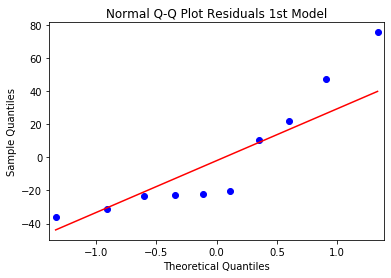

In [14]:
qqplot = sm.qqplot(model_1.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals 1st Model')
plt.show()

Summary of 1st Model 

In [29]:
model_1.summary() 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_hike   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           0.000239
Time:                        10:13:12   Log-Likelihood:                -49.995
No. Observations:                  10   AIC:                             104.0
Df Residuals:                       8   BIC:                             104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2285.3653     95.912     23.828      0.000    2064.193    2506.538
Churnout_rate    -8.1861      1.304     -6.277      0.000     -11.193      -5.179
==============================================================================
Omnibus:                        2.758   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.564
Skew:                           0.940   Prob(JB):                        0.458
Kurtosis:                       2.536   Cond. No.                         556.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficent of Model

In [30]:
model_1.params 

Intercept        2285.365297
Churnout_rate      -8.186081
dtype: float64

#### Predict New Data Point in the 1st Model Using the Formula 

In [18]:
Churn_Out_rate = 2285.365297+(8.186081*1500) 

print(Churn_Out_rate) 

14564.486797


### 2nd Model Genration by Using Log Transformation on Data  

In [17]:
dataset_2 = data 

Log Transformation on Dataset 

In [18]:
dataset_2['Salary_hike'] = np.log(dataset_2['Salary_hike']) 

dataset_2['Churnout_rate'] = np.log(dataset_2['Churnout_rate']) 

#### Visualization of Log Transformed Data 

Visualization of Salary_hike Column 

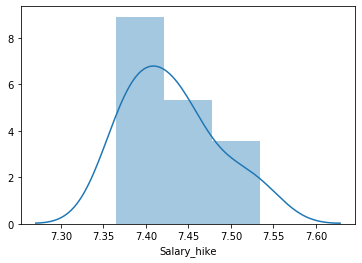

In [50]:
sns.distplot(dataset_2['Salary_hike'])  

Visualization of Churnout_rate Column 

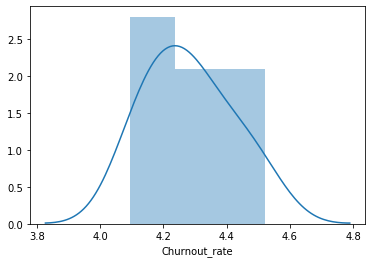

In [51]:
sns.distplot(dataset_2['Churnout_rate']) 

#### Fitting 2nd Simple Linear Regression Model on Log Transformed data 

In [19]:
model_2 = smf.ols('Salary_hike~Churnout_rate',data=dataset_2).fit() 

Test for Normality of Residuals (Q-Q Plot) of 2nd Model

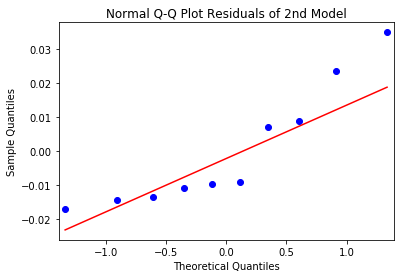

In [20]:
qqplot = sm.qqplot(model_2.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals of 2nd Model')
plt.show() 

Summary of 2nd Model 

In [53]:
model_2.summary() 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_hike   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     64.13
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           4.33e-05
Time:                        13:15:30   Log-Likelihood:                 26.585
No. Observations:                  10   AIC:                            -49.17
Df Residuals:                       8   BIC:                            -48.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.0042      0.197     45.794      0.000       8.551       9.458
Churnout_rate    -0.3677      0.046     -8.008      0.000      -0.474      -0.262
==============================================================================
Omnibus:                        2.424   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                1.466
Skew:                           0.891   Prob(JB):                        0.480
Kurtosis:                       2.415   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3rd Model Genration by Normalization of Data 

In [21]:
dataset_3 = data 

Normalization of Data 

In [22]:
from sklearn.preprocessing import Normalizer 

C:\Users\Nakul Raje\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nakul Raje\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [23]:
array3 = dataset_3.values 

In [24]:
x3 = array3[:,0:2] 

In [25]:
scaler3 = Normalizer().fit(x3) 

In [26]:
normalizedx3 = scaler3.transform(x3) 

In [27]:
array3 = normalizedx3 

In [28]:
data3 = pd.DataFrame(array3,columns=['Salary_hike','Churnout_rate']) 

#### Visualzation of Normalized Data using Dist Plot 

Visualization of Salary_Hike column 

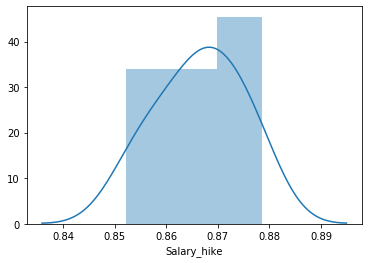

In [63]:
sns.distplot(data3['Salary_hike']) 

Visuvalization of Churnout_rate Column 

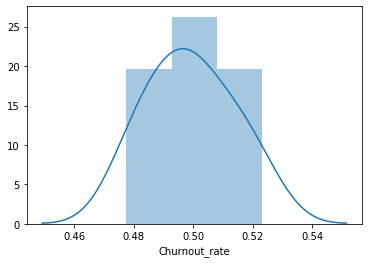

In [64]:
sns.distplot(data3['Churnout_rate']) 

#### Fitting 3rd Simple Linear Regression Model on Normalized Data 

In [29]:
model_3 = smf.ols('Salary_hike~Churnout_rate',data=data3).fit() 

Test for Normality of Residuals (Q-Q Plot) of 3rd Model

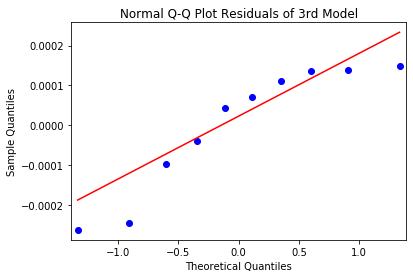

In [30]:
qqplot = sm.qqplot(model_3.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals of 3rd Model') 
plt.show() 

Summary of 3rd Model 

In [66]:
model_3.summary() 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_hike   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.336e+04
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           3.75e-15
Time:                        13:29:56   Log-Likelihood:                 74.002
No. Observations:                  10   AIC:                            -144.0
Df Residuals:                       8   BIC:                            -143.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1548      0.002    611.858      0.000       1.150       1.159
Churnout_rate    -0.5778      0.004   -152.851      0.000      -0.587      -0.569
==============================================================================
Omnibus:                        1.837   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.264
Skew:                          -0.731   Prob(JB):                        0.532
Kurtosis:                       2.055   Cond. No.                         90.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""